# Exploratory data anlaysis of the mouse data

The data link: [Allen's institute open data set](http://celltypes.brain-map.org/rnaseq)

# area of VISp

![title](https://www.lucidchart.com/publicSegments/view/a39b1b88-6079-49eb-b7d4-9c5d62e8cf71/image.png)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.executable # check the python location

'/usr/bin/python3'

## explore gene names

In [3]:
genes = pd.read_csv('../data/mouse_VISp_2018-06-14_genes-rows.csv') # gene information
genes.head()

,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
0,0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
1,0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
2,0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
3,0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
4,0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene


# range of gene id

In [4]:
np.min(genes['gene_id']), np.max(genes['gene_id'])

(500699669, 500745463)

## how many chromosomes are there?

In [5]:
sorted(np.unique(genes['chromosome']))

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'MT',
 'X',
 'Y']

## number of genes

In [6]:
num_genes = genes.shape[0]
print(num_genes) 

45768


## is symbol/id/name unique for each gene?

In [7]:
print(num_genes, 
      len(np.unique(genes['gene_id'])),
      len(np.unique(genes['gene_entrez_id'])),
     len(np.unique(genes['gene_name'])),
     len(np.unique(genes['gene_symbol'])))

45768 45768 45768 45659 45768


### observation: some genes have the same name

## What are the genes that have the same name

In [8]:
duplicated = genes.loc[genes.duplicated(subset='gene_name', keep=False),].sort_values('gene_name')
duplicated.head(20)

,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
26239,LOC102632821,500704031,2,102632821,60S acidic ribosomal protein P1-like
26639,LOC102637947,500710404,4,102637947,60S acidic ribosomal protein P1-like
32424,Mgat4c,500725643,10,67569,"MGAT4 family, member C"
32425,Mgat4d,500720799,8,67555,"MGAT4 family, member C"
2021,A530046M15Rik,500731144,13,328190,RIKEN cDNA A530046M15 gene
2027,A530065N20Rik,500732099,13,328263,RIKEN cDNA A530046M15 gene
27047,LOC104053954,500743349,X,104053954,Rhox11 pseudogene
27048,LOC104053955,500743343,X,104053955,Rhox11 pseudogene
25972,LOC100418104,500700812,1,100418104,"UDP glycosyltransferase 1 family, polypeptide ..."
25973,LOC100418105,500700817,1,100418105,"UDP glycosyltransferase 1 family, polypeptide ..."


## load the data

In [9]:
cell = pd.read_csv('../data/mouse_VISp_2018-06-14_samples-columns.csv')

In [10]:
cell

,sample_name,sample_id,sample_type,organism,donor,sex,age_days,eye_condition,genotype,driver_lines,...,genes_detected_cpm_criterion,genes_detected_fpkm_criterion,tdt_cpm,gfp_cpm,class,subclass,cluster,confusion_score,cluster_correlation,core_intermediate_call
0,F1S4_160108_001_A01,527128530,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10445,9222,248.86,248.86,GABAergic,Vip,Vip Arhgap36 Hmcn1,0.4385,0.837229,Intermediate
1,F1S4_160108_001_B01,527128536,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11600,10370,289.61,289.61,GABAergic,Lamp5,Lamp5 Lsp1,0.1025,0.878743,Core
2,F1S4_160108_001_C01,527128542,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11848,10734,281.06,281.06,GABAergic,Lamp5,Lamp5 Lsp1,0.0195,0.887084,Core
3,F1S4_160108_001_D01,527128548,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,9494,8561,390.02,390.02,GABAergic,Vip,Vip Crispld2 Htr2c,0.2734,0.843552,Core
4,F1S4_160108_001_E01,527128554,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10012,8791,253.92,253.92,GABAergic,Lamp5,Lamp5 Plch2 Dock5,0.7532,0.854994,Core
5,F1S4_160108_001_F01,527128560,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10696,9145,195.80,195.80,GABAergic,Sst,Sst Tac1 Tacr3,0.4291,0.856063,Core
6,F1S4_160108_001_G01,527128566,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,12692,11724,150.84,150.84,GABAergic,Sncg,Sncg Vip Itih5,0.0599,0.898292,Core
7,F1S4_160108_001_H01,527128572,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11755,10939,293.20,293.20,GABAergic,Lamp5,Lamp5 Krt73,0.0491,0.893809,Core
8,F1S4_160108_002_A01,527128578,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10680,9799,284.78,284.78,GABAergic,Vip,Vip Igfbp6 Car10,0.2854,0.827172,Intermediate
9,F1S4_160108_002_B01,527128584,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10420,9197,225.43,225.43,GABAergic,Lamp5,Lamp5 Plch2 Dock5,0.0259,0.855536,Core


# how many donors are there?

In [13]:
print('number of donors {}'.format(len(np.unique(cell['donor']))))

number of donors 201


# age distribution of donors?

In [19]:
# sanity check: each donor should have the same age
np.unique(cell.groupby('donor')['age_days'].std())

array([ 0., nan, nan, nan, nan, nan])

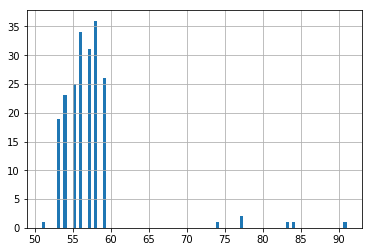

In [22]:
cell.groupby('donor')['age_days'].mean().hist(bins=100)

*most are between 50-60 days, a few are above 70 days*

# gender distribution in the mouses

In [36]:
cell.groupby('donor')['sex'].agg(lambda x:x.value_counts().index[0]).reset_index().groupby('sex').count()

,donor
sex,
F,67
M,134


# hemisphere distribution

In [57]:
# sanity check if each mice only has one hemisphere
hemi_count = cell.groupby('donor')['brain_hemisphere'].agg(lambda x: len(np.unique(x))).reset_index()
hemi_count.groupby('brain_hemisphere')['donor'].count().reset_index()

,brain_hemisphere,donor
0,1,160
1,2,41


*160 mouse only have one hemisphere cells while 41 have cells from both sides*

In [66]:
single_hemi = hemi_count[hemi_count['brain_hemisphere'] == 1]['donor']

In [64]:
cell[cell['donor'].isin(single_hemi)].groupby('donor')['brain_hemisphere'].agg(lambda x: x.iloc[0]).reset_index().groupby('brain_hemisphere')['donor'].count().reset_index()

,brain_hemisphere,donor
0,L,160


*Single hemisphere are all left hemispheres.*

## Q:What does "0" mean?

# eye condition distribution

In [67]:
#TODO

## load first column of the exon data

In [11]:
exon_first_col = pd.read_csv('../data/mouse_VISp_2018-06-14_exon-matrix.csv', usecols=[0])
exon_first_col.columns = ['gene_id']
exon_first_col.head()
print(exon_first_col.shape)

(45768, 1)


## gene_id in excon matches gene_entrez_id column in gene_info.csv

In [12]:
tmp = set(exon_first_col['gene_id']) 
tmp2 = set(genes['gene_entrez_id'])
tmp2 == tmp

True

## load first 10 row of the exon data

In [13]:
exon_first_row = pd.read_csv('../data/mouse_VISp_2018-06-14_exon-matrix.csv', nrows=10)
exon_first_row.columns = ['gene_id'] + list(exon_first_row.columns[1:])
exon_first_row.head(10)

,gene_id,F1S4_160108_001_A01,F1S4_160108_001_B01,F1S4_160108_001_C01,F1S4_160108_001_D01,F1S4_160108_001_E01,F1S4_160108_001_F01,F1S4_160108_001_G01,F1S4_160108_001_H01,F1S4_160108_002_A01,...,FYS4_171004_103_G01,FYS4_171004_103_H01,FYS4_171004_104_A01,FYS4_171004_104_B01,FYS4_171004_104_C01,FYS4_171004_104_D01,FYS4_171004_104_E01,FYS4_171004_104_F01,FYS4_171004_104_G01,FYS4_171004_104_H01
0,71661,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,76253,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58520,79,121,89,115,390,61,72,161,118,...,263,45,88,81,187,99,49,123,112,37
3,66050,140,175,68,0,177,110,149,60,61,...,136,82,74,104,51,160,165,245,179,91
4,100125929,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
5,66838,29,23,13,0,41,0,14,24,0,...,0,10,0,0,8,42,40,0,0,0
6,66839,48,2,28,46,0,0,0,3,16,...,46,0,1,18,4,0,7,9,0,21
7,100039060,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,71675,0,181,100,35,0,0,188,8,189,...,0,11,88,39,0,29,15,0,40,189
9,104457,30,196,75,17,42,25,81,15,97,...,60,64,49,98,67,0,39,57,40,23


***
## Compute the std of each gene head counts

In [14]:
exon = pd.read_csv('../data/mouse_VISp_2018-06-14_exon-matrix.csv', index_col=0)

In [15]:
gene_std = exon.std(axis=1).to_frame('std')
gene_std['log_std'] = np.log10(1 + gene_std['std'])

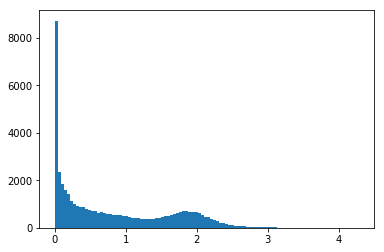

In [16]:
h = plt.hist(gene_std['log_std'], bins = 100)

## <font color=blue> Observation: some genes have no variation at all! </font>

### The largest ten std genes

In [17]:
gene_std['std'].nlargest(n = 10)

72289     19202.110203
22353     17659.351092
109648    10637.323565
19215     10563.480124
20604      7258.597175
12314      6420.229526
13010      6009.585398
20614      5930.805249
110183     4757.237368
18823      4682.107910
Name: std, dtype: float64

## How many genes have zero std?

In [18]:
np.mean(gene_std['std'] == 0)

0.08027442754763153

## How many genes have std < 10?

In [19]:
np.mean(gene_std['std'] < 10)

0.6451887781856319

## How many genes have std > 1000?

In [20]:
np.mean(gene_std['std'] > 1000), np.sum(gene_std['std'] > 1000)

(0.0029278098234574376, 134)

## The variance explained by the genes with std > 1000

In [21]:
gene_std.head()

,std,log_std
71661,4.474752,0.738364
76253,2.830929,0.583304
58520,123.864912,2.096440
66050,116.298170,2.069291
100125929,3.995826,0.698607


In [22]:
np.mean(gene_std['std'] ** 2), np.mean(np.mean(exon**2)) - np.mean(np.mean(exon)) ** 2

(42036.55400212598, 90430.67125891757)

In [23]:
np.sum(gene_std.loc[gene_std['std'] > 1000, 'std'] ** 2) / np.sum(gene_std['std'] ** 2)

0.8212797109391082

## The PCA of the matrix

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(exon)
print(pca.explained_variance_ratio_)

[0.59793777 0.08803346 0.08024207 0.03421054 0.02927371 0.0157498
 0.01249029 0.01075814 0.00832594 0.00802627 0.00713862 0.00622569
 0.00572374 0.00464042 0.00407126 0.00371205 0.00342563 0.00288104
 0.00243957 0.00221614]


Text(0, 0.5, 'Explained variance (ratio)')

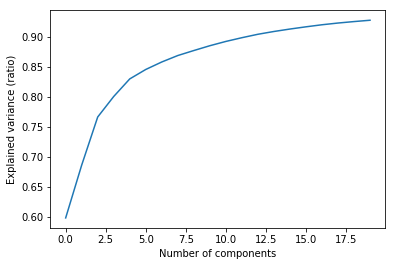

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance (ratio)')

## Observation: 20 components explained ~90% variance.